<a href="https://colab.research.google.com/github/samuel-zahner/Intro-to-AI/blob/main/logistic_regression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import math
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


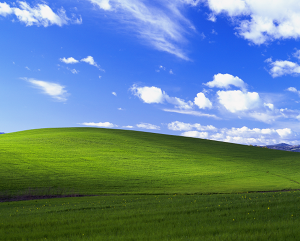

In [ ]:
#import image
image1 = Image.open('/content/gdrive/My Drive/Colab Notebooks/to RGB/bliss.png')
image1 = image1.convert('RGB')

image1

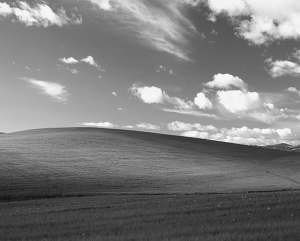

In [ ]:
#convert image to grayscale
image2 = ImageOps.grayscale(image1)
image2

In [ ]:
#simoid function --> bounded between 0 and 1
def sigmoid(w, x):
  z = np.dot(w,x)
  h = 1/(1+math.exp(1)**(-z)) + .00000001
  return h

In [ ]:
#model for red, green, and blue values
def model(w, x):
  red = sigmoid(w[0],x)
  green = sigmoid(w[1],x)
  blue = sigmoid(w[2],x)

  #extrapolate values between 0 and 1 to between 0 and 255
  red = 255 * red.mean()
  green = 255 * green.mean()
  blue = 255 * blue.mean()

  #print(x)
  #print(red)
  return [red, green, blue]

In [ ]:
#calculate the loss for a specific pixel
def loss_fnc(w, x, y):
  loss_red = y[0] * math.log(model(w,x)[0]) + (1-y[0])*math.log(1-model(w, x)[0])
  loss_green = y[1] * math.log(model(w,x)[1]) + (1-y[1])*math.log(1-model(w, x)[1])
  loss_blue = y[2] * math.log(model(w,x)[2]) + (1-y[2])*math.log(1-model(w, x)[2])
  total_loss = loss_red + loss_green + loss_blue
  return total_loss

In [ ]:
#calculate the gradient for the red, green, blue values of a pixel
def L(w, x, y):
  gradient_red = np.dot((model(w,x)[0] - y[0]),x)
  gradient_green =  np.dot((model(w,x)[1] - y[1]),x)
  gradient_blue = np.dot((model(w,x)[2] - y[2]),x)

  #normalize by taking the mean
  gradient_red = gradient_red.mean()
  gradient_green = gradient_green.mean()
  gradient_blue = gradient_blue.mean()

  return [gradient_red, gradient_green, gradient_blue]

In [ ]:
#Stochastic Gradient Descent

#initialize weight parameters to 0
w = [0,0,0]

#set step size
alpha = .000001

num_epochs = 100


for epoch in range(num_epochs):
  for i in range(0, 298):
    for j in range(0, 120):
      #x = input space -> 3x3 region which is flattened to a one dimensional vector
      #image2 is grayscale image
      x = [image2.getpixel((i,j)), image2.getpixel((i+1,j)), image2.getpixel((i+2,j)), image2.getpixel((i, j+1)), 
           image2.getpixel((i+1, j+1)), image2.getpixel((i+2, j+1)), image2.getpixel((i, j+2)), image2.getpixel((i+1, j+2)), 
           image2.getpixel((i+2, j+2))]

      #y = true value of red, green, blue values
      #image 1 is color image
      y = image1.getpixel((i+1, j+1))

      gradient_red, gradient_green, gradient_blue = L(w, x, y)

      #update weights
      w[0] = w[0] - alpha * gradient_red
      w[1] = w[1] - alpha * gradient_green
      w[2] = w[2] - alpha * gradient_blue

  if epoch %10 == 0:
    print(f'epoch: {epoch}')
    total_loss = 0
    for i in range(0, 298):
      for j in range(0, 238):
        x = [image2.getpixel((i,j)), image2.getpixel((i+1,j)), image2.getpixel((i+2,j)), image2.getpixel((i, j+1)), 
           image2.getpixel((i+1, j+1)), image2.getpixel((i+2, j+1)), image2.getpixel((i, j+2)), image2.getpixel((i+1, j+2)), 
           image2.getpixel((i+2, j+2))]

        y = image1.getpixel((i+1, j+1))
        #total_loss += loss_fnc(w, x, y)
    #print(f'loss: {total_loss}')

    #print(f'loss: {loss(w,x,y)}')\s



epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90


[-0.0012069015138003077, 0.0034239729561337294, 0.015888505457969056]


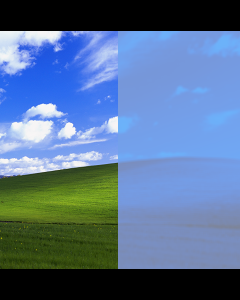

In [ ]:
data = np.zeros((300,240, 3), dtype=np.uint8)
print(w)
for i in range(0, 298):
    for j in range(0, 238):
        #use color image for half of pixels
        if i > 150:
           data[i+1][j+1] = image1.getpixel((i+1, j+1))
        #use model for other half of pixels
        else: 
          x = [image2.getpixel((i,j)), image2.getpixel((i+1,j)), image2.getpixel((i+2,j)), image2.getpixel((i, j+1)), 
            image2.getpixel((i+1, j+1)), image2.getpixel((i+2, j+1)), image2.getpixel((i, j+2)), image2.getpixel((i+1, j+2)), image2.getpixel((i+2, j+2))]
          r,g,b = model(w,x)
          data[i+1][j+1] = [r,g,b]
#display image
image3 = Image.fromarray(data, 'RGB')
image3 = image3.rotate(-90)
image3